In [1]:
import numpy as np
import pandas as pd
import os

os.chdir("C:\\Users\\TakaiYohei\\Desktop\\process_data")

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_df = pd.read_csv('debutanizer_data.csv')
all_df.head()

,y,u1,u2,u3,u4,u5,u6,u7
0,0.180,0.269,0.651,0.833,0.583,0.785,0.843,0.822
1,0.177,0.268,0.650,0.852,0.578,0.776,0.839,0.822
2,0.174,0.268,0.660,0.824,0.572,0.765,0.808,0.786
3,0.172,0.267,0.668,0.808,0.566,0.753,0.800,0.786
4,0.167,0.267,0.647,0.762,0.560,0.745,0.773,0.746


In [3]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2394 entries, 0 to 2393
Data columns (total 8 columns):
y     2394 non-null float64
u1    2394 non-null float64
u2    2394 non-null float64
u3    2394 non-null float64
u4    2394 non-null float64
u5    2394 non-null float64
u6    2394 non-null float64
u7    2394 non-null float64
dtypes: float64(8)
memory usage: 149.7 KB


In [4]:
all_df.describe()

,y,u1,u2,u3,u4,u5,u6,u7
count,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000,2394.000000
mean,0.267789,0.283882,0.667845,0.598462,0.435952,0.658082,0.620737,0.589403
std,0.158946,0.103127,0.057695,0.198576,0.138237,0.127047,0.165110,0.173248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169000,0.224000,0.654000,0.500000,0.363000,0.609000,0.482000,0.445000
50%,0.247000,0.264000,0.672000,0.624000,0.396000,0.695000,0.639500,0.601000
75%,0.318000,0.325750,0.691000,0.742750,0.518000,0.730000,0.755000,0.741000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


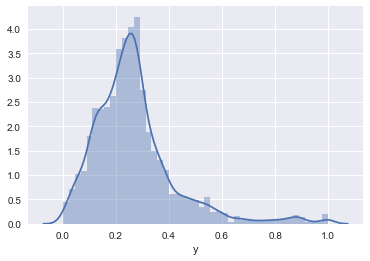

In [5]:
sns.distplot(all_df['y'], hist=True, kde=True, rug=False)
plt.show()

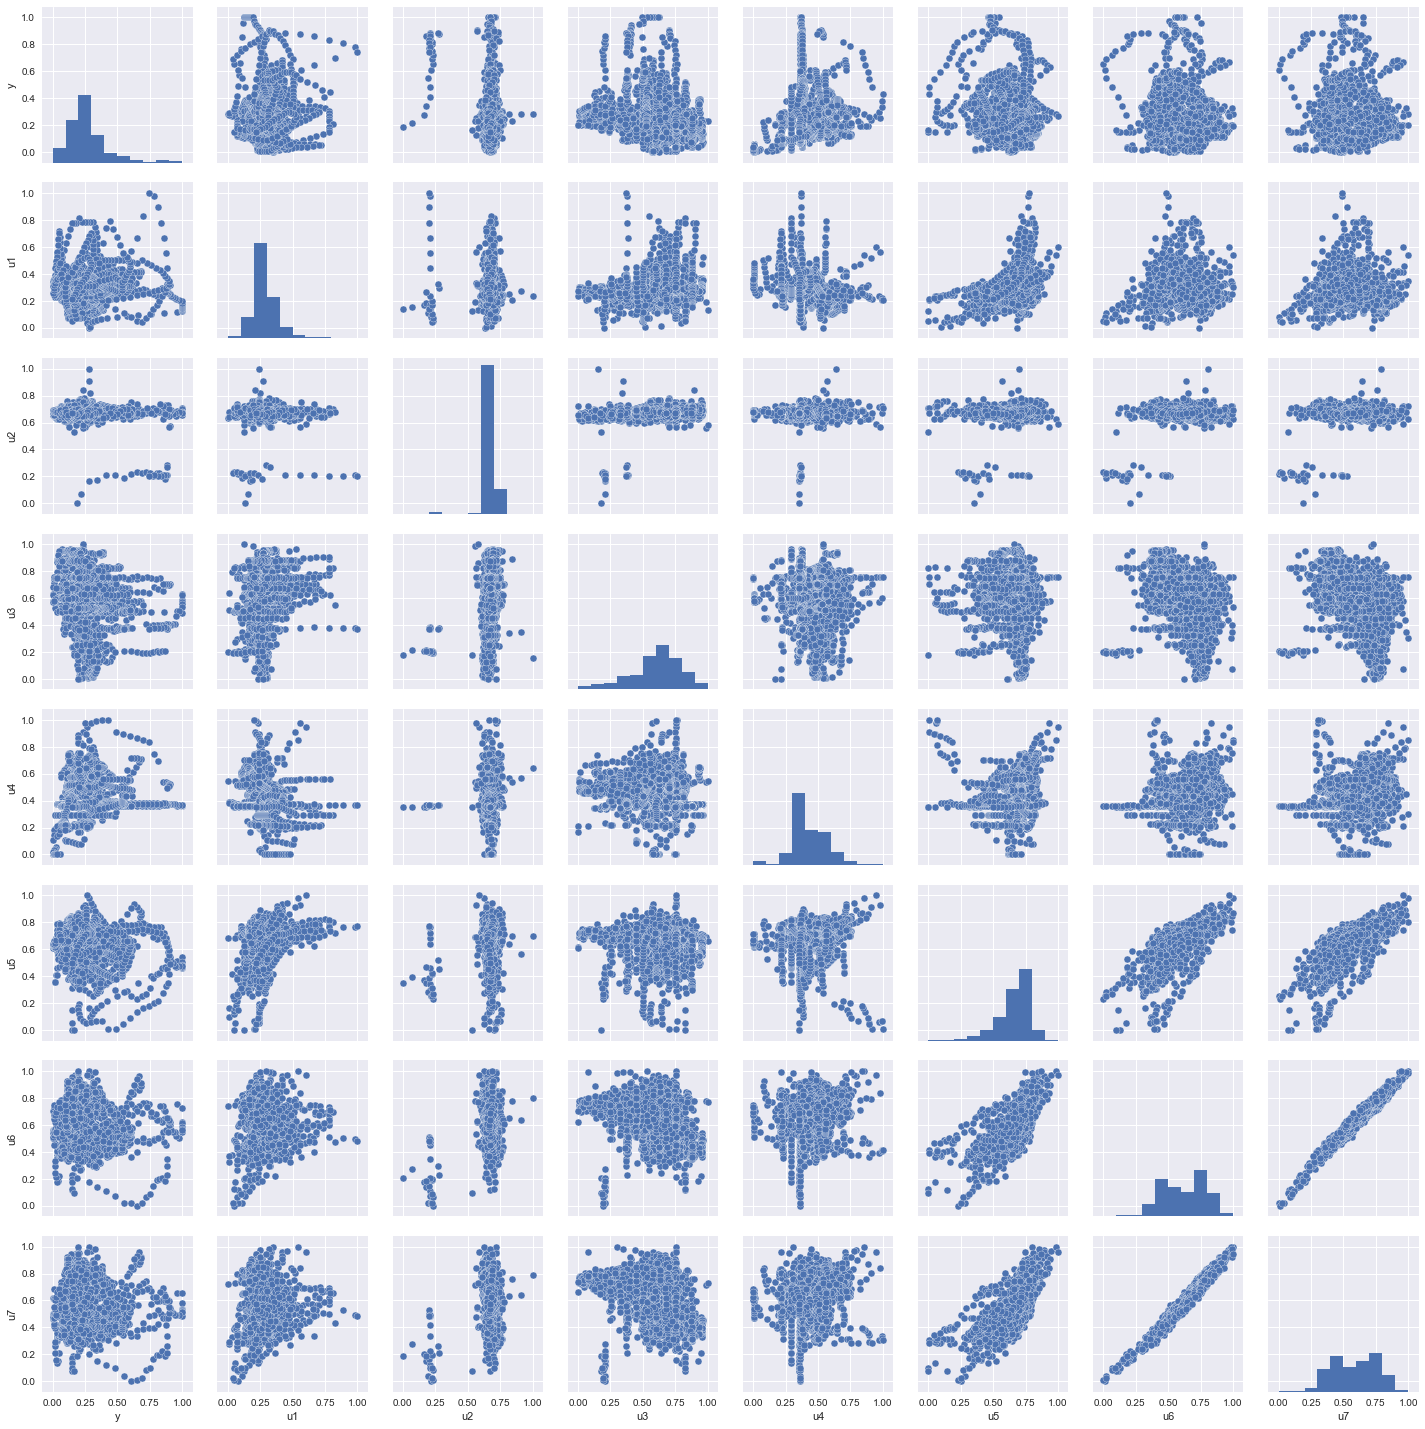

In [6]:
sns.pairplot(all_df)

In [15]:
arr = all_df.as_matrix()[:,1:8]
print(arr)
print(type(arr[0][0]))

[[0.269 0.651 0.833 ... 0.785 0.843 0.822]
 [0.268 0.65  0.852 ... 0.776 0.839 0.822]
 [0.268 0.66  0.824 ... 0.765 0.808 0.786]
 ...
 [0.247 0.666 0.665 ... 0.561 0.602 0.523]
 [0.229 0.673 0.677 ... 0.531 0.637 0.538]
 [0.216 0.669 0.678 ... 0.5   0.685 0.57 ]]
<class 'numpy.float64'>


In [53]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(arr)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
print('components')
print(pca.components_)
for i in range(6):
    str = 'C{0} = '.format(i)
    for j in range(7):
        str += '{:+.3f}*u{} '.format(pca.components_[i][j], j+1)
    print(str)

components
[[ 0.06153658  0.0124605   0.42112735 -0.20856433 -0.30149243 -0.56485184
  -0.60436361]
 [-0.14560384 -0.10598881 -0.85972508 -0.04077163 -0.36141899 -0.236
  -0.20113844]
 [-0.43256629  0.01751482  0.16813238  0.83838939 -0.27932784 -0.02624924
  -0.05197405]
 [ 0.72098159 -0.08687472 -0.17197849  0.50099493  0.33247551 -0.22225937
  -0.17923898]
 [ 0.50812637  0.2909959   0.06178372  0.02083465 -0.73186365  0.28022702
   0.19678942]
 [ 0.09936421 -0.94600353  0.14134085 -0.02237593 -0.22630141  0.10005552
   0.11620123]]
C0 = +0.062*u1 +0.012*u2 +0.421*u3 -0.209*u4 -0.301*u5 -0.565*u6 -0.604*u7 
C1 = -0.146*u1 -0.106*u2 -0.860*u3 -0.041*u4 -0.361*u5 -0.236*u6 -0.201*u7 
C2 = -0.433*u1 +0.018*u2 +0.168*u3 +0.838*u4 -0.279*u5 -0.026*u6 -0.052*u7 
C3 = +0.721*u1 -0.087*u2 -0.172*u3 +0.501*u4 +0.332*u5 -0.222*u6 -0.179*u7 
C4 = +0.508*u1 +0.291*u2 +0.062*u3 +0.021*u4 -0.732*u5 +0.280*u6 +0.197*u7 
C5 = +0.099*u1 -0.946*u2 +0.141*u3 -0.022*u4 -0.226*u5 +0.100*u6 +0.116*u7 


In [57]:
print(arr.shape)
print(pca.components_.shape)
newX = np.dot(arr, pca.components_.T)
print(newX.shape)

(2394, 7)
(6, 7)
(2394, 6)


(2394, 1)


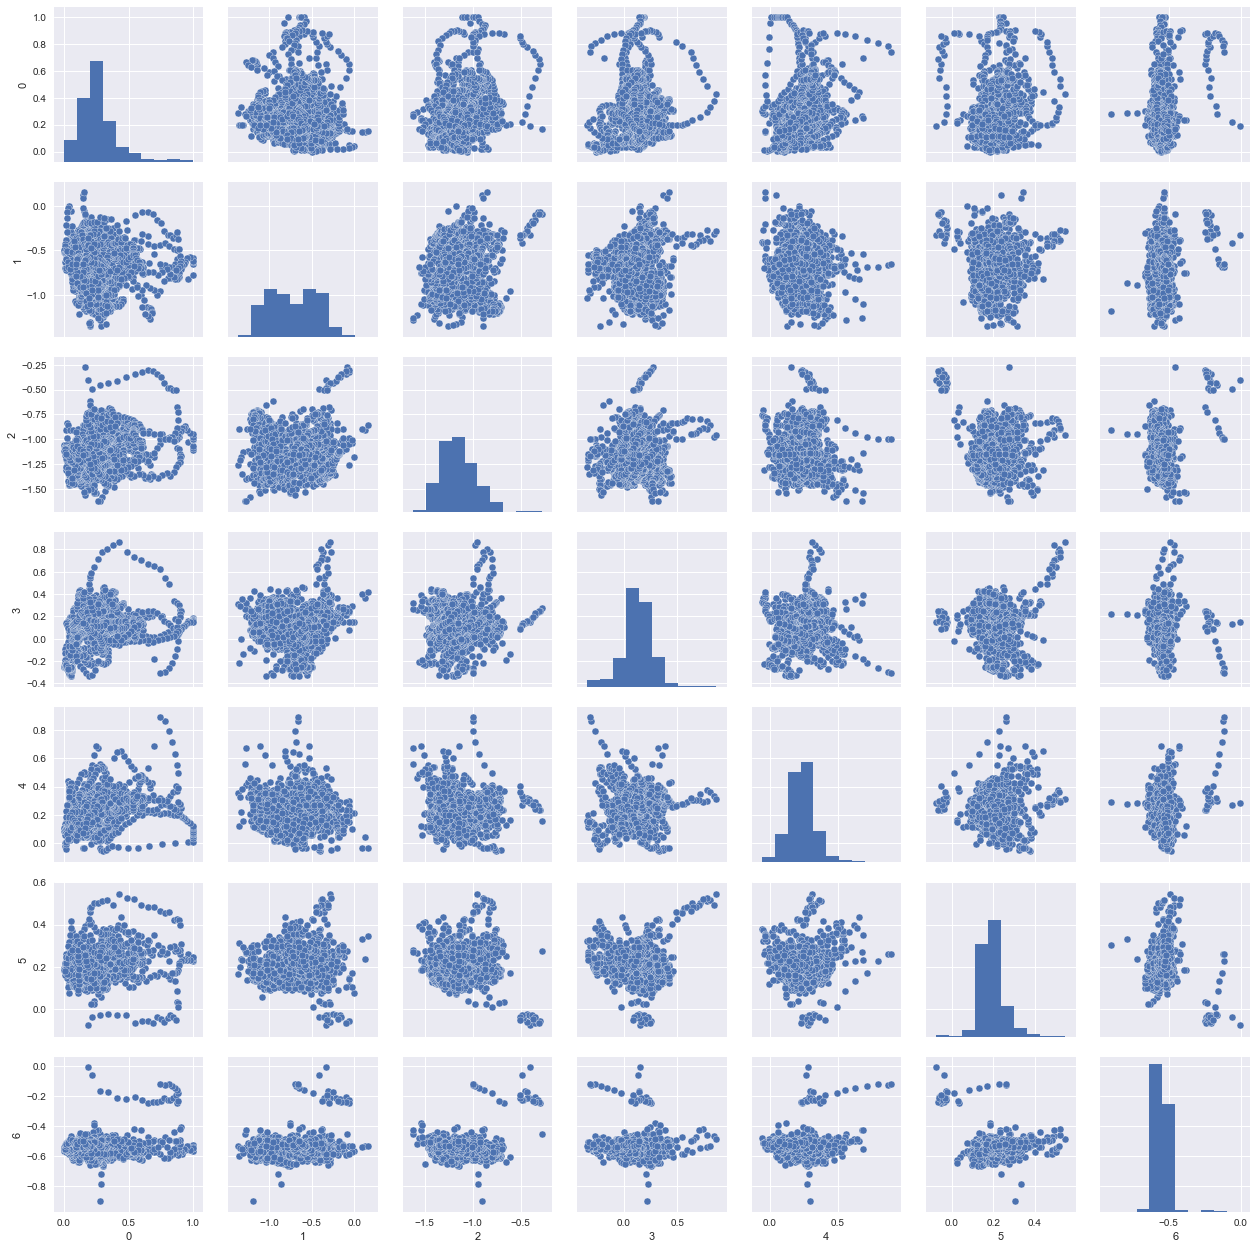

In [58]:
y = all_df['y'].values
y = y.reshape(y.shape[0], 1)
print(y.shape)

newdf = pd.DataFrame(np.concatenate([y, newX], axis=1))
sns.pairplot(newdf)